In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 3s 1us/step


In [3]:
print(train_data.shape)
print(test_data.shape)

(8982,)
(2246,)


In [6]:
word_to_index = reuters.get_word_index()
index_to_word = {idx:word for word, idx in word_to_index.items()}

decoded_newswire = ' '.join([index_to_word.get(idx-3, "?") for idx in train_data[0]])

print('Encoded news =', train_data[10])
print('Decoded news =', decoded_newswire)

Encoded news = [1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]
Decoded news = ? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [9]:
import numpy as np

def vectorize(sequences, ndim=10000):
    result = np.zeros((len(sequences), ndim))
    for idx, sequence in enumerate(sequences):
        result[idx, sequence] = 1.
    return result

x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [14]:
def to_one_hot(labels, ndim=46):
    result = np.zeros((len(labels), ndim))
    for idx, label in enumerate(labels):
        result[idx, label] = 1.
    return result

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
# Or use keras utility
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [19]:
from keras import models
from keras import layers

# To prevent information bottleneck, use middle layers which has input shape is bigger than 46.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

# Last layer that activate function is softmax makes probability distribution about 46 output class.

In [20]:
# Using categorical_crossentrypy as a loss function.

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [21]:
# Use first 1000 samples for validation.

x_val = x_train[:1000]
y_val = one_hot_train_labels[:1000]

partial_x_train = x_train[1000:]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
# Train with epoch=20

history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 221us/step - loss: 2.4997 - acc: 0.4899 - val_loss: 1.6813 - val_acc: 0.6480
Epoch 2/20
7982/7982 [==============================] - 1s 69us/step - loss: 1.3915 - acc: 0.7038 - val_loss: 1.2790 - val_acc: 0.7190
Epoch 3/20
7982/7982 [==============================] - 1s 68us/step - loss: 1.0487 - acc: 0.7699 - val_loss: 1.1181 - val_acc: 0.7610
Epoch 4/20
7982/7982 [==============================] - 1s 69us/step - loss: 0.8246 - acc: 0.8282 - val_loss: 1.0217 - val_acc: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 68us/step - loss: 0.6599 - acc: 0.8637 - val_loss: 0.9688 - val_acc: 0.7970
Epoch 6/20
7982/7982 [==============================] - 1s 71us/step - loss: 0.5254 - acc: 0.8931 - val_loss: 0.9200 - val_acc: 0.8090
Epoch 7/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.4291 - acc: 0.9118 - val_loss: 0.9108 - val_acc: 0.8030
Epoch 

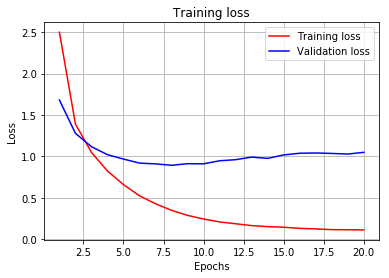

In [29]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(20) + 1

plt.figure('Training loss')
plt.title('Training loss')
plt.plot(epochs, loss, color='r', label='Training loss')
plt.plot(epochs, val_loss, color='b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

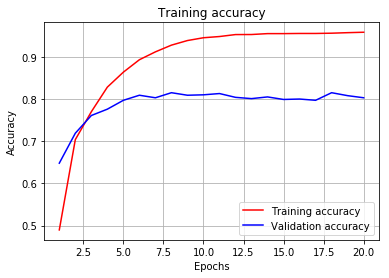

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']

plt.figure('Training accuracy')
plt.title('Training accuracy')
plt.plot(epochs, acc, color='r', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

In [35]:
# Model is overfitting after epoch=9.

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.fit(partial_x_train, partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 88us/step - loss: 2.5398 - acc: 0.5226 - val_loss: 1.6733 - val_acc: 0.6570
Epoch 2/9
7982/7982 [==============================] - 1s 67us/step - loss: 1.3712 - acc: 0.7121 - val_loss: 1.2758 - val_acc: 0.7210
Epoch 3/9
7982/7982 [==============================] - 1s 72us/step - loss: 1.0136 - acc: 0.7781 - val_loss: 1.1303 - val_acc: 0.7530
Epoch 4/9
7982/7982 [==============================] - 1s 71us/step - loss: 0.7976 - acc: 0.8251 - val_loss: 1.0539 - val_acc: 0.7590
Epoch 5/9
7982/7982 [==============================] - 1s 73us/step - loss: 0.6393 - acc: 0.8624 - val_loss: 0.9754 - val_acc: 0.7920
Epoch 6/9
7982/7982 [==============================] - 1s 72us/step - loss: 0.5124 - acc: 0.8921 - val_loss: 0.9102 - val_acc: 0.8140
Epoch 7/9
7982/7982 [==============================] - 1s 69us/step - loss: 0.4124 - acc: 0.9137 - val_loss: 0.8932 - val_acc: 0.8210
Epoch 8/9
7982

In [37]:
result = model.evaluate(x_test, one_hot_test_labels)

print('Accuracy =', result[1])

2246/2246 [==============================] - 0s 71us/step
[1.0224982673104916, 0.77560106861941647]


In [43]:
predictions = model.predict(x_test)

pred = predictions[0]

print(pred.shape)
print(np.sum(pred))
print(np.argmax(pred))

(46,)
1.0
3
[ 5 42  9 26 14 44 22 28 45  0 32 24 15 35  2 13 27  7 10 43 34 40 33 37 12
 23  1 38  6 29 36 31 17 39 18 25 30 41 21 20 16 19 11  8  4  3]


In [50]:
# Make bottlenecks in training.

model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 90us/step - loss: 3.1696 - acc: 0.2433 - val_loss: 2.6142 - val_acc: 0.2740
Epoch 2/20
7982/7982 [==============================] - 1s 66us/step - loss: 2.0606 - acc: 0.5461 - val_loss: 1.7033 - val_acc: 0.5860
Epoch 3/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.5012 - acc: 0.6233 - val_loss: 1.5122 - val_acc: 0.6390
Epoch 4/20
7982/7982 [==============================] - 0s 57us/step - loss: 1.2887 - acc: 0.6907 - val_loss: 1.4120 - val_acc: 0.6780
Epoch 5/20
7982/7982 [==============================] - 0s 60us/step - loss: 1.1457 - acc: 0.7159 - val_loss: 1.3673 - val_acc: 0.6830
Epoch 6/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.0403 - acc: 0.7313 - val_loss: 1.3424 - val_acc: 0.6980
Epoch 7/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.9587 - acc: 0.7422 - val_loss: 1.3388 - val_acc: 0.7010
Epoch 8

In [52]:
result = model.evaluate(x_test, one_hot_test_labels)

# Accuracy has decreased from 77% to 69% with bottlenecks.
print('Accuracy =', result[1])

2246/2246 [==============================] - 0s 58us/step
Accuracy = 0.690560997329


In [53]:
# Add one more layer and increase the rank of middle layers for training.

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(partial_x_train, partial_y_train,
          epochs=20,
          batch_size=512,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 121us/step - loss: 2.2980 - acc: 0.5332 - val_loss: 1.4329 - val_acc: 0.6710
Epoch 2/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.2450 - acc: 0.7261 - val_loss: 1.1960 - val_acc: 0.7280
Epoch 3/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.8698 - acc: 0.8106 - val_loss: 1.0373 - val_acc: 0.7790
Epoch 4/20
7982/7982 [==============================] - 1s 76us/step - loss: 0.6509 - acc: 0.8529 - val_loss: 1.0712 - val_acc: 0.7720
Epoch 5/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.4677 - acc: 0.8976 - val_loss: 1.0649 - val_acc: 0.7710
Epoch 6/20
7982/7982 [==============================] - 1s 79us/step - loss: 0.3623 - acc: 0.9231 - val_loss: 1.0586 - val_acc: 0.7810
Epoch 7/20
7982/7982 [==============================] - 1s 80us/step - loss: 0.2873 - acc: 0.9376 - val_loss: 0.9532 - val_acc: 0.8080
Epoch 

In [54]:
result = model.evaluate(x_test, one_hot_test_labels)

print('Accuracy =', result[1])

2246/2246 [==============================] - 0s 72us/step
Accuracy = 0.78005342837


In [55]:
import keras.backend as K

K.clear_session()